# Score Metrics

## Fetch all repositories

In [1]:
from edfi_tech_metrics.ossf_score import fetch_repositories

# Fetch repositories for Ed-Fi-Alliance-OSS and Ed-Fi-Exchange-OSS
ed_fi_alliance_repos = fetch_repositories('Ed-Fi-Alliance-OSS')
ed_fi_exchange_repos = fetch_repositories('Ed-Fi-Exchange-OSS')

# Combine the repositories
repositories = ed_fi_alliance_repos + ed_fi_exchange_repos

# Display the repositories
# repositories

### Retrieve OSSF Scores

In [2]:
import math
import pandas as pd

from edfi_tech_metrics.ossf_score import report_ossf_scores

# Get and print the OSSF scores
ossf_scores = report_ossf_scores(repositories)
ossf_scores_df = pd.DataFrame(list(ossf_scores.items()), columns=['Repository', 'Score'])

# Filter out the repositories where math.isnan is false
valid_ossf_scores_df = ossf_scores_df[ossf_scores_df['Score'].apply(lambda x: not math.isnan(x))]

# Filter out the repositories where math.isnan is true
invalid_ossf_scores_df = ossf_scores_df[ossf_scores_df['Score'].apply(lambda x: math.isnan(x))]


### OSSF Score Histogram

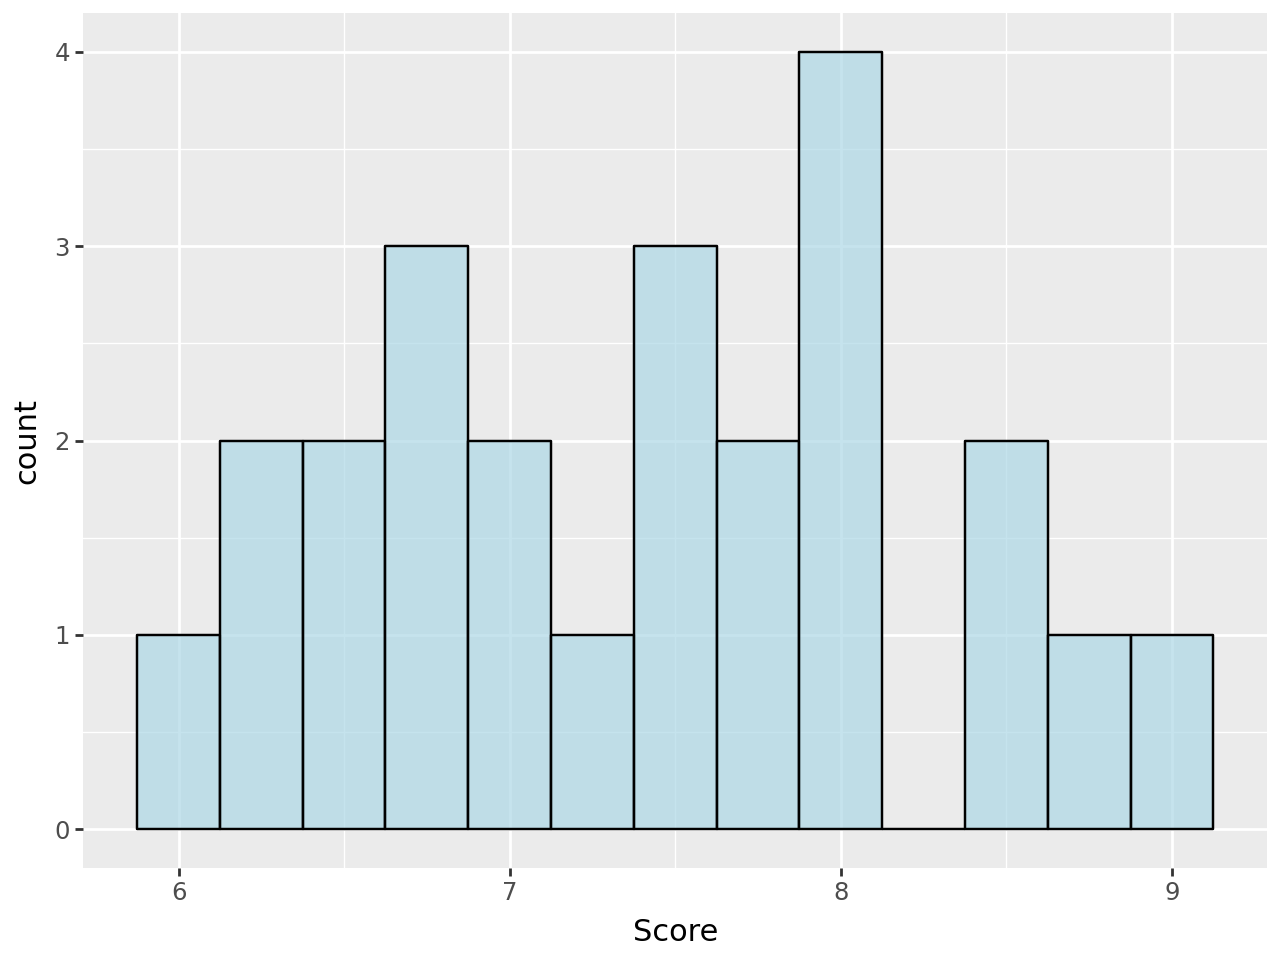

In [3]:
from plotnine import ggplot, aes, geom_histogram

# Plot the OSSF scores
plot = ggplot(valid_ossf_scores_df, aes(x='Score')) + geom_histogram(bins=10,binwidth=0.25, fill='lightblue', color='black', alpha=0.7)

plot

### OSSF Scores

In [4]:
display(valid_ossf_scores_df.sort_values(by='Score', ascending=False).reset_index(drop=True))

valid_ossf_scores_df.describe()

,Repository,Score
0,Ed-Fi-Alliance-OSS/Data-Management-Service,9.0
1,Ed-Fi-Alliance-OSS/AdminAPI-1.x,8.7
2,Ed-Fi-Alliance-OSS/Ed-Fi-ODS-AdminApp,8.6
3,Ed-Fi-Alliance-OSS/Ed-Fi-DataImport,8.6
4,Ed-Fi-Exchange-OSS/Meadowlark,8.1
5,Ed-Fi-Alliance-OSS/Ed-Fi-ODS-Implementation,8.1
6,Ed-Fi-Alliance-OSS/Ed-Fi-Databases,7.9
7,Ed-Fi-Alliance-OSS/AdminAPI-2.x,7.9
8,Ed-Fi-Alliance-OSS/Ed-Fi-API-Publisher,7.8
9,Ed-Fi-Alliance-OSS/Ed-Fi-Compatibility-Libraries,7.7


,Score
count,24.000000
mean,7.408333
std,0.856645
min,5.900000
25%,6.775000
50%,7.450000
75%,7.950000
max,9.000000


### Repositories without an OSSF Scorecard

In [5]:
display(invalid_ossf_scores_df.reset_index(drop=True))

,Repository,Score
0,Ed-Fi-Alliance-OSS/EdFi.Installer.AppCommon,NaN
1,Ed-Fi-Alliance-OSS/Starter-Kit-SEA-Modernization,NaN
2,Ed-Fi-Alliance-OSS/Roster-Starter-Kit-for-Vendors,NaN
3,Ed-Fi-Alliance-OSS/Ed-Fi-Starter-Kit-Equity,NaN
4,Ed-Fi-Alliance-OSS/Ed-Fi-Starter-Kit-Assessments,NaN
...,...,...
88,Ed-Fi-Exchange-OSS/YesPrep-FamilyEngagementPor...,NaN
89,Ed-Fi-Exchange-OSS/ParallelAPIConsumption,NaN
90,Ed-Fi-Exchange-OSS/Student-Engagement-Management,NaN
91,Ed-Fi-Exchange-OSS/n8n-demo-file-to-API,NaN


### Saving OSSF Scores to a .csv file

In [6]:
from datetime import datetime

# Save the scores to a CSV file
now = datetime.strftime(datetime.now(), "%Y-%m-%d")
output_file = f"./data/ossf-scores/{now}.csv"
ossf_scores_df.to_csv(output_file, index=False)

print(f"OSSF scores saved to {output_file}")

OSSF scores saved to ./data/ossf-scores/2024-06-26.csv
